In [1]:
%matplotlib inline
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval

from coincidence_correction import coincidence_correction, CoincidenceCorrection
from uvot_image import SwiftPixelResolution

In [2]:
scale = SwiftPixelResolution.data_mode

In [3]:
# images from 2015 apr 28
uw1_fits_path = pathlib.Path("/Users/shawnoset/swift_data/C_2013US10/00033758003/uvot/image/sw00033758003uw1_sk.img.gz")
uw1_raw = fits.getdata(uw1_fits_path, ext=1)
# exposure time of this image found in the image header
uw1_countrates = uw1_raw / 196.6330828954

In [4]:
uvv_fits_path = pathlib.Path("/Users/shawnoset/swift_data/C_2013US10/00033758002/uvot/image/sw00033758002uvv_sk.img.gz")
uvv_raw = fits.getdata(uvv_fits_path, ext=1)
uvv_countrates = uvv_raw / 196.6222

In [5]:
def show_fits_and_coimap(img, coimap):
    _, axes = plt.subplots(1, 3, figsize=(30, 10))

    zscale = ZScaleInterval()
    vmin, vmax = zscale.get_limits(img)
    
    ax = axes[0]
    ax.imshow(img, vmin=vmin, vmax=vmax, origin="lower")
    ax.set_title("image")
    
    axcoi = axes[1]
    zscalecoi = ZScaleInterval()
    vmincoi, vmaxcoi = zscale.get_limits(coimap)
    axcoi.imshow(coimap, vmin=vmincoi, vmax=vmaxcoi, origin="lower")
    axcoi.set_title("coimap")
    
    product = img*coimap
    axproduct = axes[2]
    zscaleprod = ZScaleInterval()
    vminp, vmaxp = zscale.get_limits(product)
    axproduct.imshow(product, vmin=vminp, vmax=vmaxp, origin="lower")
    axproduct.set_title("product")

    plt.show()

In [6]:
uw1_coimap = coincidence_correction(uw1_countrates, scale)
uvv_coimap = coincidence_correction(uvv_countrates, scale)

/Users/selfreference/repos/swift_comet_pipeline/coincidence_correction.py:35: RuntimeWarning: invalid value encountered in divide
  ratio = cr_corrected / raw_pixel_count_rate


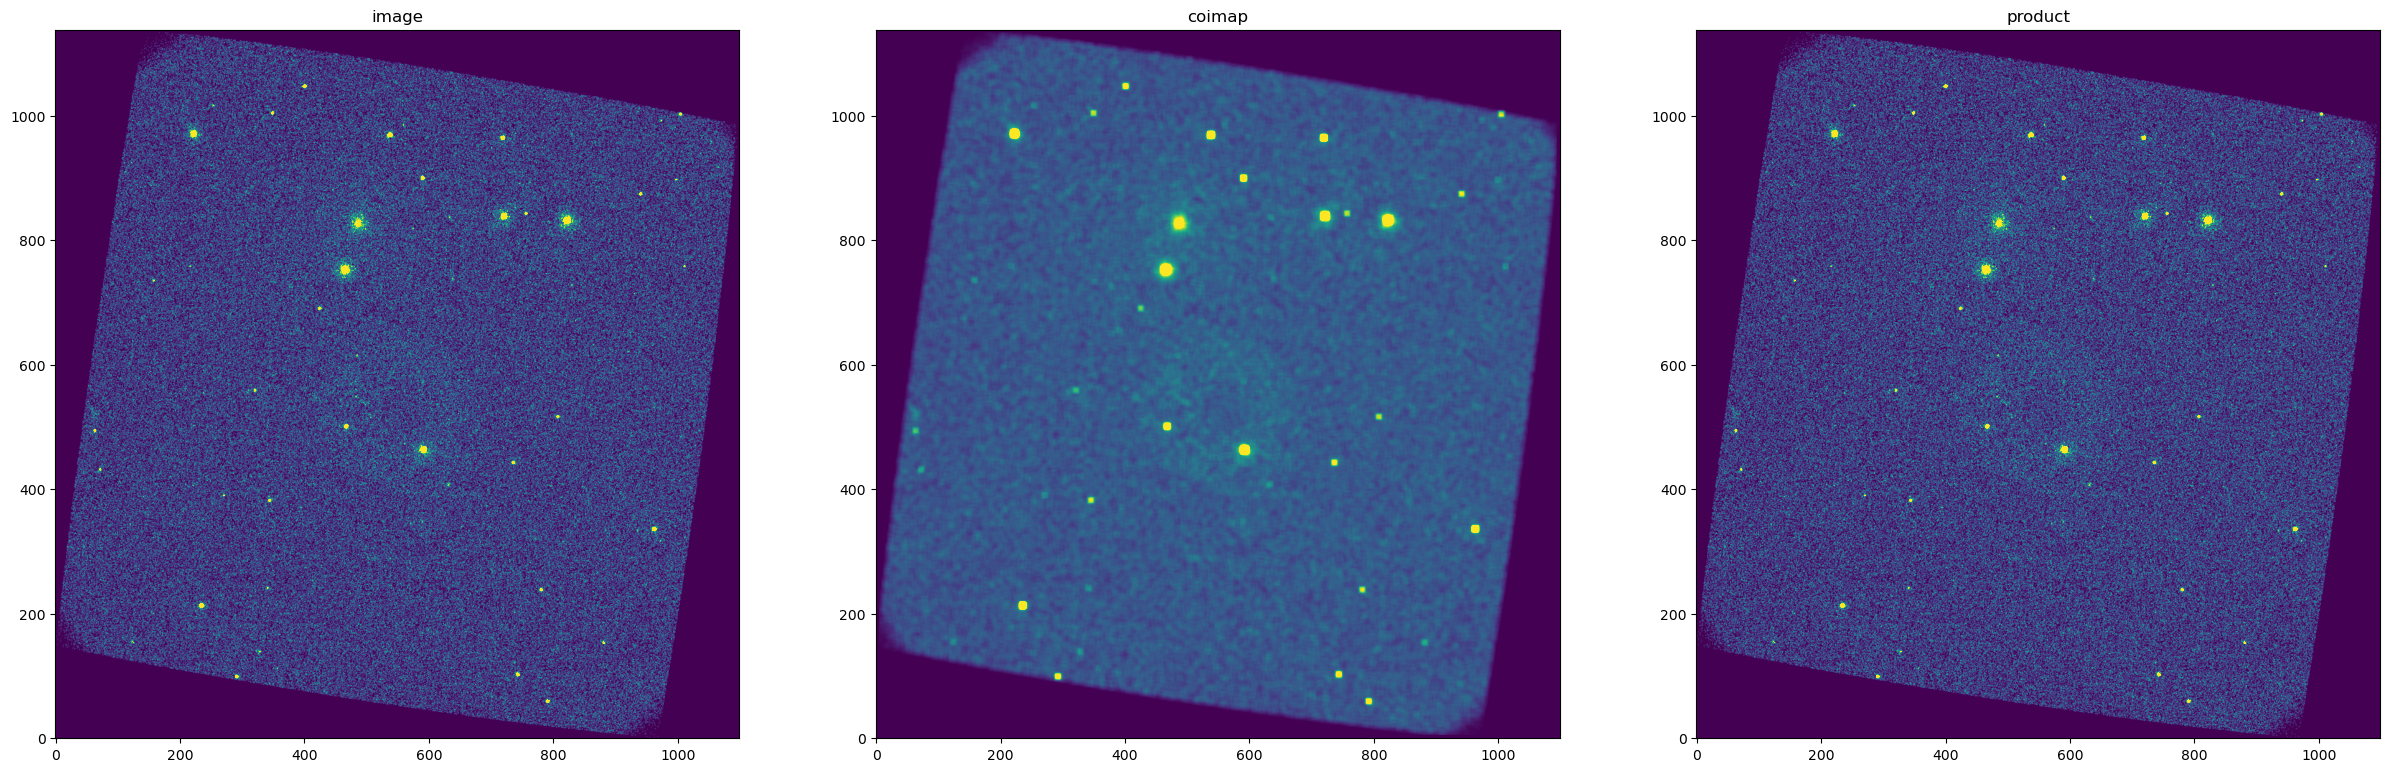

In [7]:
show_fits_and_coimap(uw1_raw, uw1_coimap)

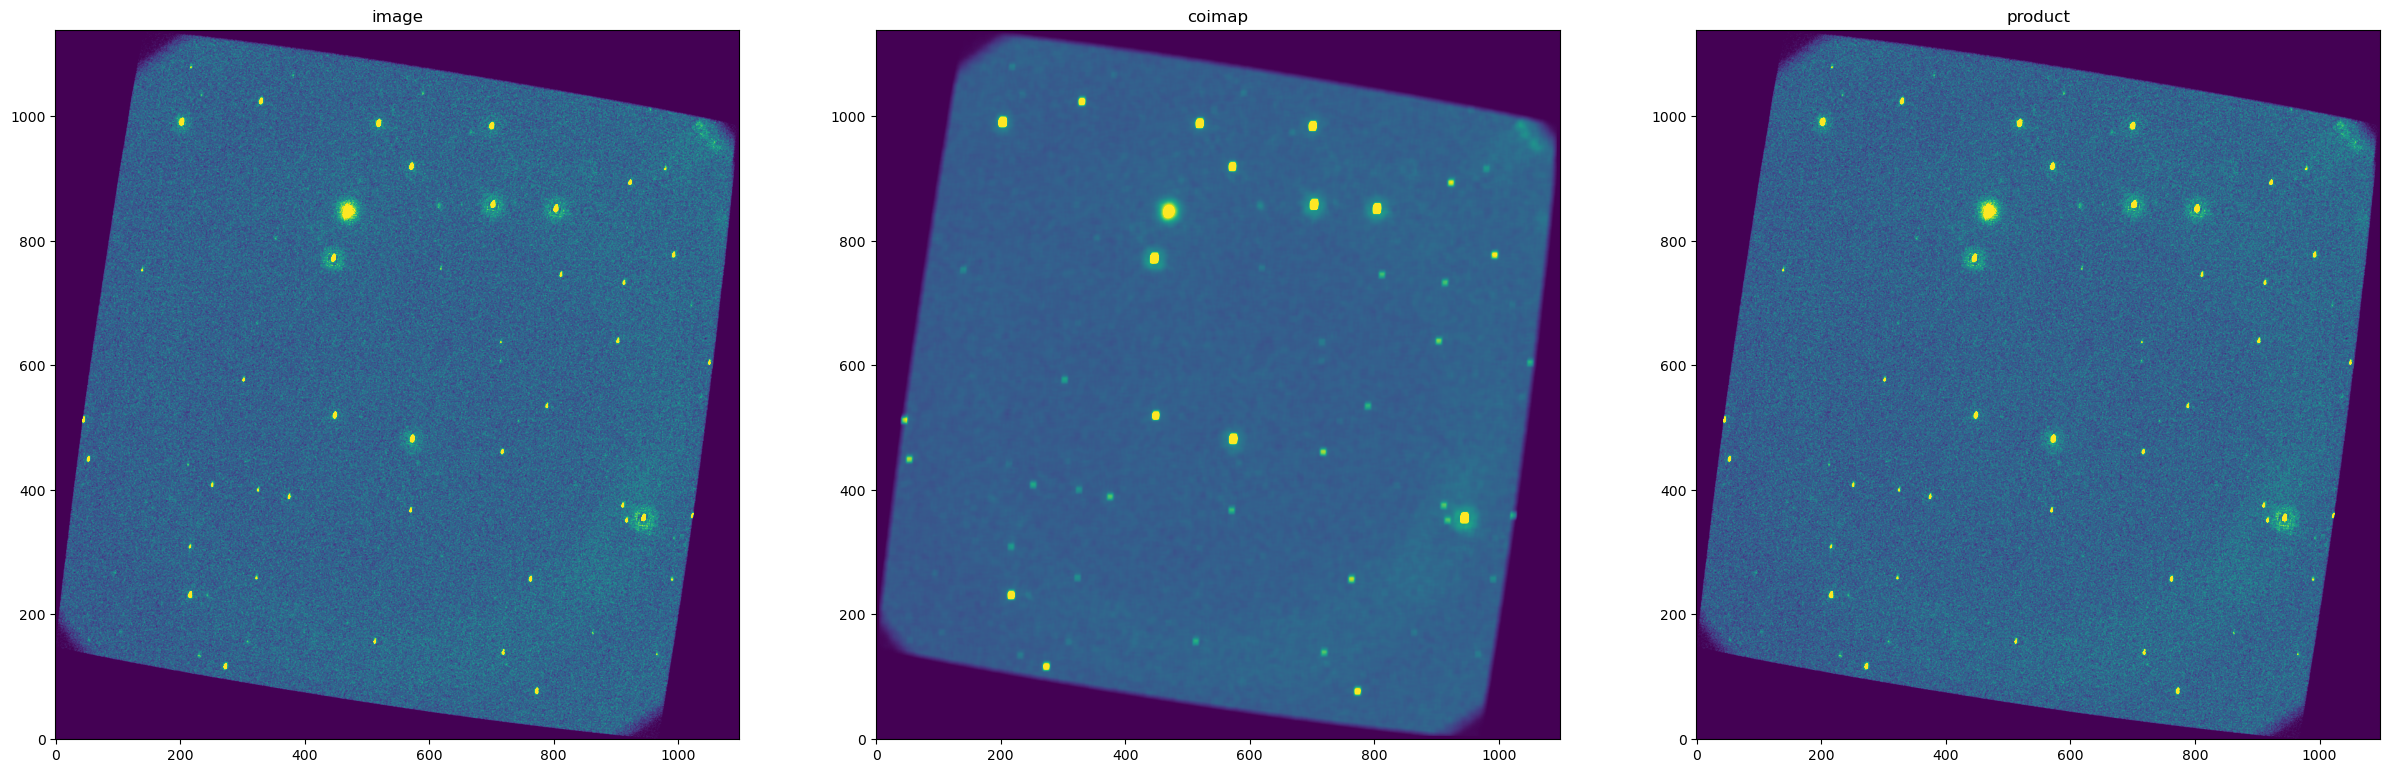

In [8]:
show_fits_and_coimap(uvv_raw, uvv_coimap)

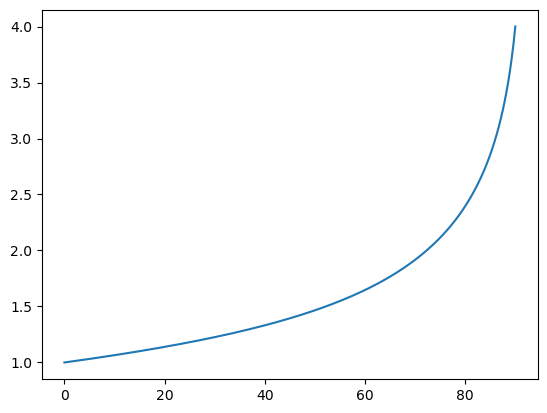

In [9]:
# re-create Poole et al. 2008, figure 6
coi = CoincidenceCorrection()
xs = np.linspace(0, 90, num=500)
plt.plot(xs, coi.coi_factor(xs))
plt.show()